In [1]:
!pip install tensorflow matplotlib


Import necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Let's play with defined CNN

In [3]:
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


11490434/11490434 [==============================] - 2s 0us/step


CNN
• Conv2D
• AvgPooling2D
• Conv2D


In [4]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),


    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])


Model compilataion

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the data to have a single channel (grayscale)
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

Let's Train the model

In [6]:
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Extract feature maps from the initial three layers
layer_outputs = [layer.output for layer in model.layers[:3]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_images)


Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1466 - accuracy: 0.9561 - val_loss: 0.0642 - val_accuracy: 0.9812
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0523 - accuracy: 0.9840 - val_loss: 0.0435 - val_accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0454 - val_accuracy: 0.9844
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0377 - val_accuracy: 0.9875
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


Now lwt's visalize

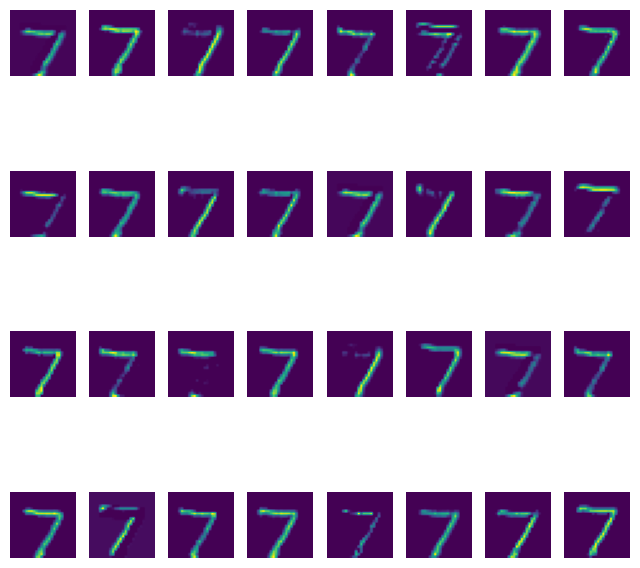

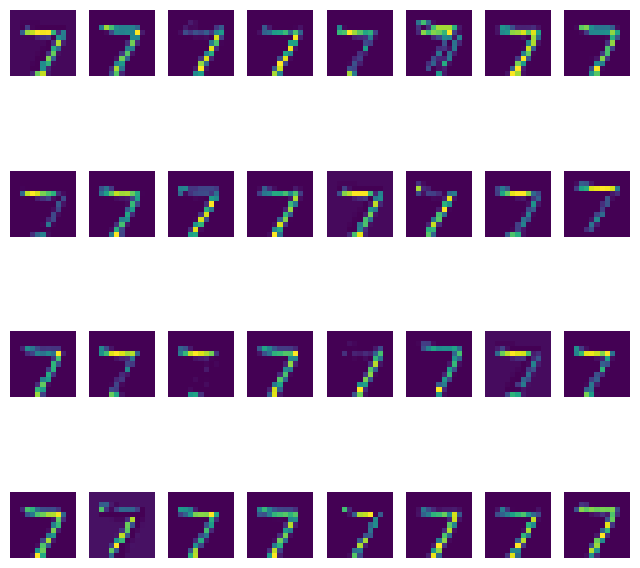

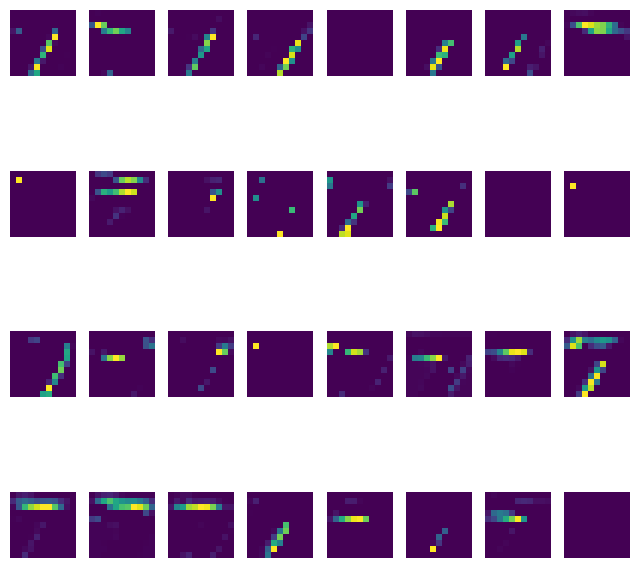

In [7]:
# Visualize feature maps
for i in range(3):
    plt.figure(figsize=(8, 8))
    for j in range(32):
        plt.subplot(4, 8, j+1)
        plt.imshow(activations[i][0, :, :, j], cmap='viridis')
        plt.axis('off')
    plt.show()

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Save the trained model to a file
model.save("E:\MVDIA 4\model.h5")

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0376 - val_accuracy: 0.9901
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.0442 - val_accuracy: 0.9881
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0431 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0433 - val_accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0412 - val_accuracy: 0.9896


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Task 2

Capture images of your own handwriting, ensuring to include at least three different digits.
Subsequently, evaluate these images using the trained neural network

In [9]:
#libraries
from google.colab import files
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Upload your images to Colab
uploaded = files.upload()

Saving dhp3.jpeg to dhp3.jpeg
Saving dhp4.jpeg to dhp4.jpeg
Saving dhp5.jpeg to dhp5.jpeg


In [10]:
# List the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

Uploaded file: dhp3.jpeg
Uploaded file: dhp4.jpeg
Uploaded file: dhp5.jpeg


In [11]:
# Specify the file paths of the uploaded images
image_paths = list(uploaded.keys())

# Load and preprocess images
handwritten_images = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in image_paths]
handwritten_images = [cv2.resize(img, (28, 28))/255.0 for img in handwritten_images]

# Convert images to numpy array
handwritten_images = np.array(handwritten_images).reshape((-1, 28, 28, 1))


In [12]:
# Load the trained model
model = load_model("E:\MVDIA 4\model.h5")

# Evaluate images
predictions = model.predict(handwritten_images)

# Display predictions
for i, pred in enumerate(predictions):
    digit = np.argmax(pred)
    print(f"Prediction for {image_paths[i]}: {digit}")

1/1 [==============================] - 0s 208ms/step
Prediction for dhp3.jpeg: 3
Prediction for dhp4.jpeg: 7
Prediction for dhp5.jpeg: 3


Task 3

Experiment with adjusting hyper-parameters, such as learning rate, epoch, and the number of
feature maps

In [13]:
# Define the CNN model with adjustable hyperparameters
def create_model(learning_rate=0.001, epochs=5, num_feature_maps=32):
    model = models.Sequential([
        layers.Conv2D(num_feature_maps, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(num_feature_maps * 2, (3, 3), activation='relu'),


        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model with the specified learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Reshape the data to have a single channel (grayscale)
    train_images_reshaped = train_images.reshape((-1, 28, 28, 1))
    test_images_reshaped = test_images.reshape((-1, 28, 28, 1))

    # Train the model with the specified number of epochs
    model.fit(train_images_reshaped, train_labels, epochs=epochs, validation_data=(test_images_reshaped, test_labels))

    return model

# Experiment with different hyperparameters
model_1 = create_model(learning_rate=0.01, epochs=10, num_feature_maps=64)
model_2 = create_model(learning_rate=0.001, epochs=5, num_feature_maps=32)



Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1231 - accuracy: 0.9639 - val_loss: 0.0639 - val_accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0603 - accuracy: 0.9819 - val_loss: 0.0521 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0472 - accuracy: 0.9860 - val_loss: 0.0588 - val_accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0407 - accuracy: 0.9879 - val_loss: 0.0607 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0403 - accuracy: 0.9884 - val_loss: 0.0749 - val_accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0337 - accuracy: 0.9910 - val_loss: 0.0738 - val_accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0364 - accuracy: 0.9909 - val_loss: 0.0881 - val_accuracy

Task 4

Modify the provided network and draw a diagram of structure of modified network. Train
this modified network on the CIFAR100 dataset

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import BatchNormalization, Dropout, Input, Add
from tensorflow.keras.utils import plot_model

In [21]:
# Load and preprocess the CIFAR-100 dataset
cifar100 = tf.keras.datasets.cifar100
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Modified CNN model for CIFAR-100 with BatchNorm, Different Filter Sizes, and Residual Connections
def modified_cifar_model():
    input_layer = Input(shape=(32, 32, 3))

    # Block 1
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 2
    y = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    y = BatchNormalization()(y)
    y = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(y)
    y = BatchNormalization()(y)
    y = layers.MaxPooling2D((2, 2))(y)

    # Residual Connection
    residual = layers.Conv2D(128, (1, 1), strides=(2, 2), padding='same')(x)
    y = Add()([y, residual])

    # Block 3
    z = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(y)
    z = BatchNormalization()(z)
    z = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(z)
    z = BatchNormalization()(z)
    z = layers.MaxPooling2D((2, 2))(z)

    # Residual Connection
    residual = layers.Conv2D(256, (1, 1), strides=(2, 2), padding='same')(y)
    z = Add()([z, residual])

    # Global Average Pooling
    z = layers.GlobalAveragePooling2D()(z)

    # Fully Connected Layers
    z = layers.Dense(512, activation='relu')(z)
    z = Dropout(0.5)(z)
    z = layers.Dense(256, activation='relu')(z)
    z = Dropout(0.3)(z)

    # Output Layer
    output_layer = layers.Dense(100, activation='softmax')(z)  # CIFAR-100 has 100 classes

    # Create model
    model = models.Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_17 (Conv2D)          (None, 32, 32, 64)           1792      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_9 (Bat  (None, 32, 32, 64)           256       ['conv2d_17[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 conv2d_18 (Conv2D)          (None, 32, 32, 64)           36928     ['batch_normalization_9[

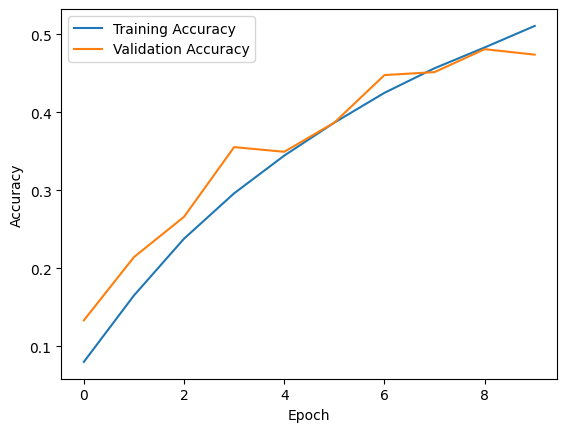

In [22]:
# Create the modified model
cifar_model = modified_cifar_model()

# Display the model summary
cifar_model.summary()

# Train the model for 10 epochs
history = cifar_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Diagram


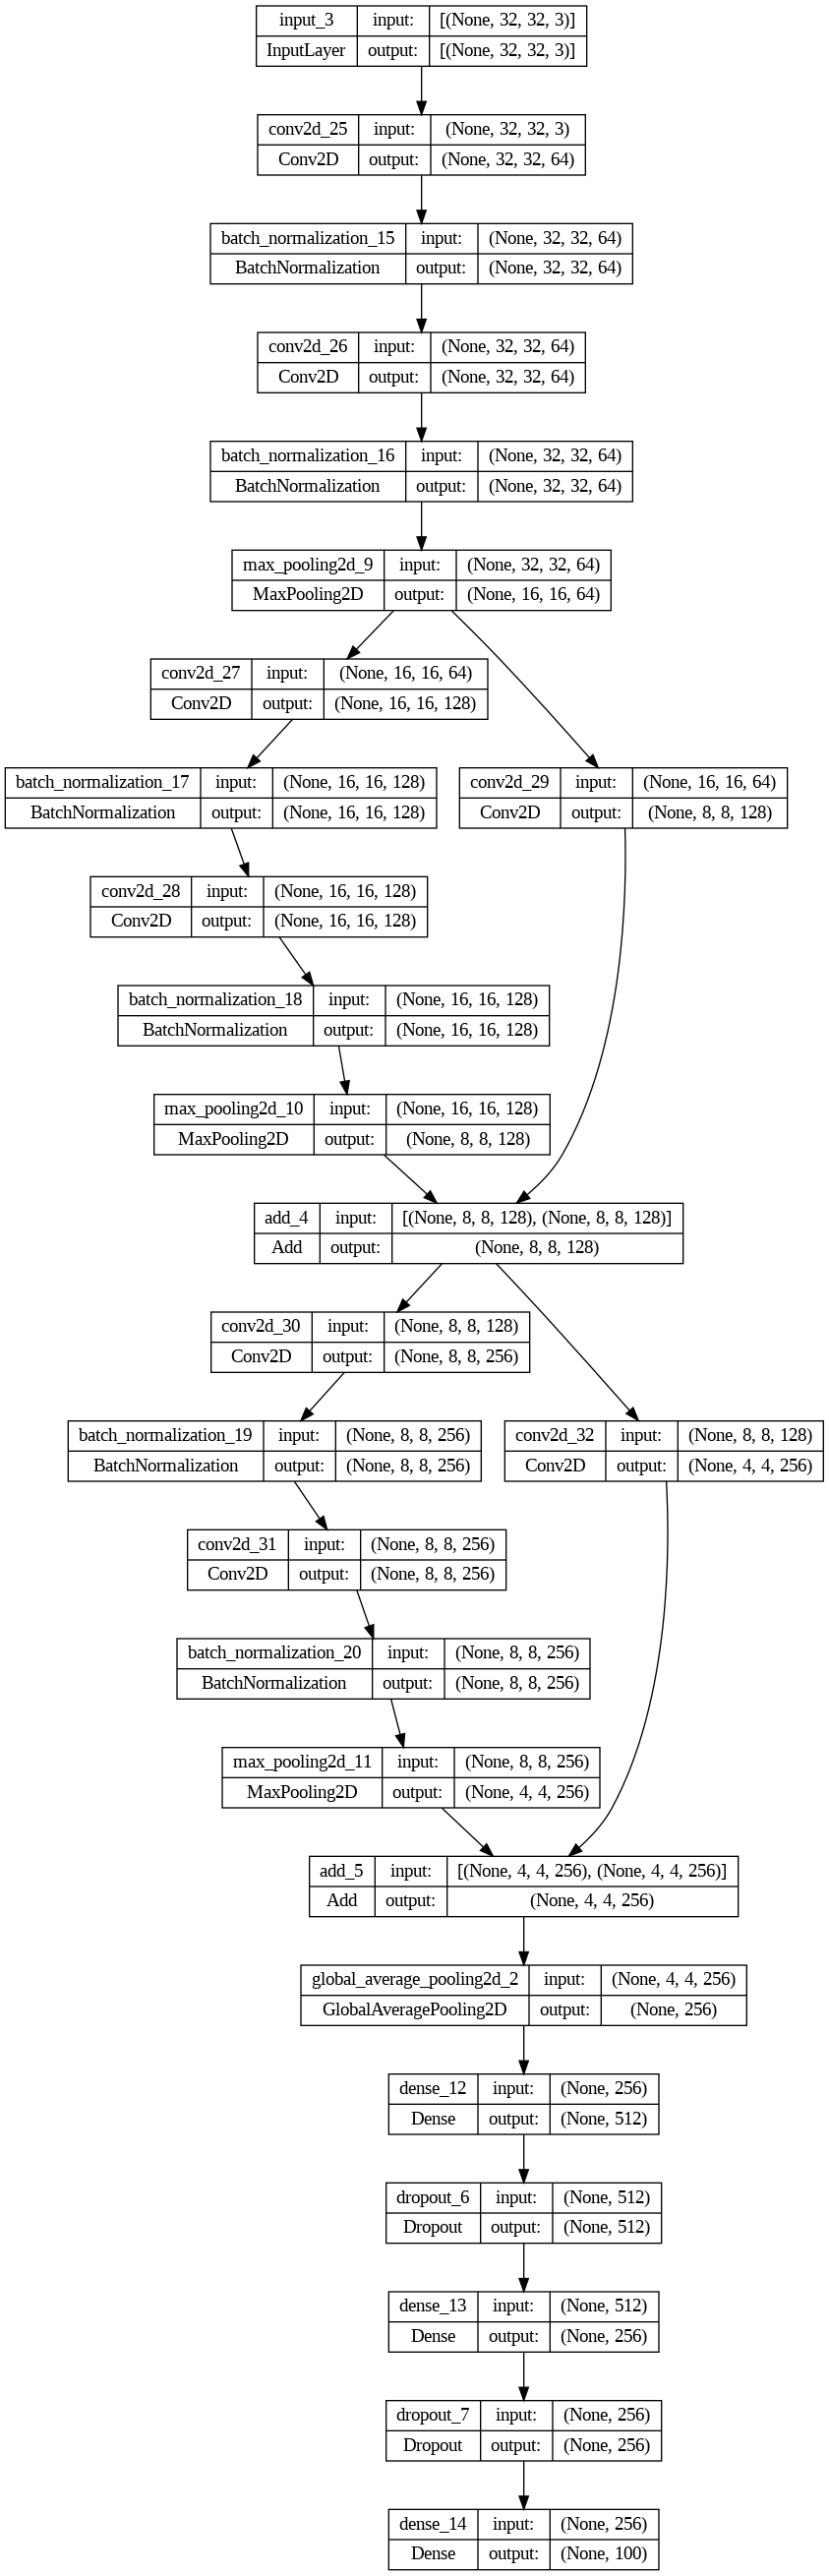

In [23]:
from tensorflow.keras.utils import plot_model

# Create the modified model
cifar_model = modified_cifar_model()

# Save the diagram to a file (e.g., modified_cifar_model.png)
plot_model(cifar_model, to_file='modified_cifar_model.png', show_shapes=True)
